# ***Question 3 - Best non fossil fuel price in the future***

At first I'm importing the required packages so I can write my code clearly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from cycler import cycler

I have found a dataset with cost per renewal energy source

This dataset is the one I will use to determine the answer to this topic

I'm importing the dataset below.

In [2]:
# import data
data_source_link = "https://ourworldindata.org/grapher/levelized-cost-of-energy.csv?v=1&csvType=full&useColumnShortNames=false"

df = pd.read_csv(data_source_link, header = 0, names=['Entity', 'Code', 'Year', 'Bio_cost', 'Geo_cost', 'Off_wind_cost', 'Solar_pv_cost', 'Solar_cc_cost', 'Hydro_cost', 'On_wind_cost'])

Next step is to clean the data by dropping missing values, I noticed that there was only workable data for all the energy sources in the world Entity, for others only solar pv and/or onshore wind data available.

So I'm using only data from the world Entity, which if you think of it is also the best to have an overall insight.

In [3]:
# Remove rows with NaN values
df_clean = df.dropna()

X = df_clean["Year"].values.reshape(-1, 1)  # Independent variable (years)
models = {}
predictions = {}

future_years = np.array([2025, 2030, 2035]).reshape(-1, 1)

for col in df_clean.columns:
    if col not in ['Year', 'Code', 'Entity'] :
        model = LinearRegression()
        model.fit(X, df_clean[col])
        models[col] = model
        predictions[col] = model.predict(future_years)


In [4]:
df_clean

,Entity,Code,Year,Bio_cost,Geo_cost,Off_wind_cost,Solar_pv_cost,Solar_cc_cost,Hydro_cost,On_wind_cost
811,World,OWID_WRL,2010,0.085815,0.055330,0.207873,0.416956,0.401626,0.044167,0.112680
813,World,OWID_WRL,2012,0.070471,0.095286,0.185082,0.260022,0.379324,0.043207,0.097705
814,World,OWID_WRL,2013,0.090375,0.070742,0.156021,0.200221,0.279589,0.048290,0.098457
815,World,OWID_WRL,2014,0.090555,0.072156,0.189964,0.182866,0.242866,0.037728,0.087883
816,World,OWID_WRL,2015,0.079670,0.064923,0.154948,0.135105,0.251364,0.041542,0.075816
817,World,OWID_WRL,2016,0.077862,0.074959,0.128386,0.118349,0.279035,0.054965,0.070178
818,World,OWID_WRL,2017,0.077739,0.078424,0.116626,0.092945,0.232843,0.057615,0.065777
819,World,OWID_WRL,2018,0.059894,0.075690,0.114166,0.078640,0.166988,0.045251,0.055872
820,World,OWID_WRL,2019,0.070283,0.074699,0.094946,0.068642,0.238029,0.046389,0.048891
821,World,OWID_WRL,2020,0.079332,0.062747,0.091455,0.061000,0.119094,0.052213,0.040604


To see which energy source is predicted to be the cheapest in 2035, we can compare the predicted costs for that year.

I did this by using a linear regression model to predict the costs for each energy source in 2025, 2030, and 2035.

Because linear regression is a simple and effective method for modeling trends over time.

In [5]:
# 3. Print predictions

for energy_type, preds in predictions.items():
    print(f"\n### {energy_type.upper()} price predictions")
    for year, price in zip(future_years.flatten(), preds):
        print(f"  {year}: {price:.2f} USD/MWh")


### BIO_COST price predictions
  2025: 0.07 USD/MWh
  2030: 0.07 USD/MWh
  2035: 0.06 USD/MWh

### GEO_COST price predictions
  2025: 0.07 USD/MWh
  2030: 0.06 USD/MWh
  2035: 0.06 USD/MWh

### OFF_WIND_COST price predictions
  2025: 0.05 USD/MWh
  2030: -0.00 USD/MWh
  2035: -0.05 USD/MWh

### SOLAR_PV_COST price predictions
  2025: -0.04 USD/MWh
  2030: -0.15 USD/MWh
  2035: -0.26 USD/MWh

### SOLAR_CC_COST price predictions
  2025: 0.06 USD/MWh
  2030: -0.05 USD/MWh
  2035: -0.16 USD/MWh

### HYDRO_COST price predictions
  2025: 0.06 USD/MWh
  2030: 0.07 USD/MWh
  2035: 0.07 USD/MWh

### ON_WIND_COST price predictions
  2025: 0.02 USD/MWh
  2030: -0.02 USD/MWh
  2035: -0.05 USD/MWh


I'm using all of the outcomes above in my graph so i can visually asses which non fossil fuel is most likely to be the cheapest in the future.

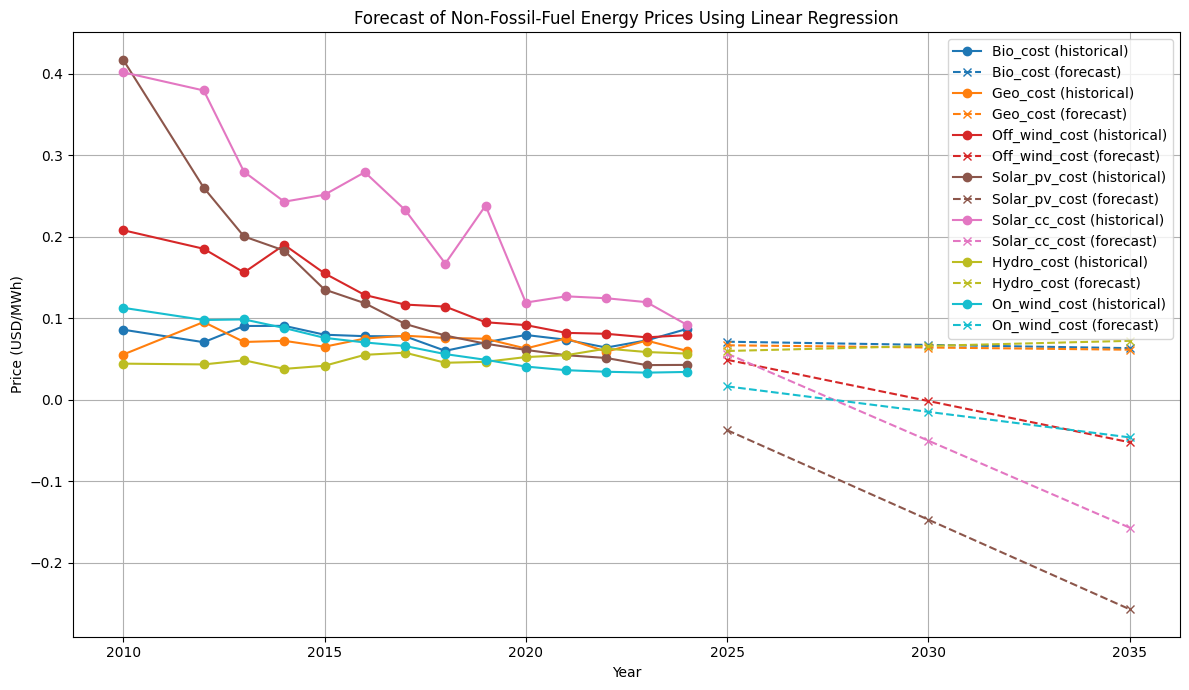

In [6]:
# 4. Plot forecasts

# create a color for each energy type and repeat each color twice
cols = [c for c in df_clean.columns if c not in ['Year', 'Code', 'Entity']]
n = len(cols)
cmap = plt.get_cmap('tab20' if n > 10 else 'tab10')
base_colors = cmap(np.linspace(0, 1, n))
rep_colors = np.repeat(base_colors, 2, axis=0)  # repeat each color so historical+forecast use same color

plt.rcParams['axes.prop_cycle'] = cycler('color', [tuple(c) for c in rep_colors])
plt.figure(figsize=(12, 7))

for col in df_clean.columns:
    if col not in ['Year', 'Code', 'Entity']:
        plt.plot(df_clean["Year"], df_clean[col], marker='o', label=f"{col} (historical)")
        plt.plot(future_years, predictions[col], marker='x', linestyle='--', label=f"{col} (forecast)")

plt.xlabel("Year")
plt.ylabel("Price (USD/MWh)")
plt.title("Forecast of Non-Fossil-Fuel Energy Prices Using Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As seen in the plot, solar photovoltaic (solar_pv_cost) is predicted to be the cheapest energy source by 2035. both of the solar energy source prices see the steepest decline over the forecast period, indicating significant cost reductions compared to other energy sources.

In reality a price under zero is not likely which is probably caused because the curve for solar and wind seems to be quadratic in nature. This may indicate that linear regression may not be the best fit for predicting a reliable future price.

# ***Conclusion***

Solar seems to be the cheapest non-fossil fuel source in the future.